In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

file_location = '' #this is where you input your image directory inside the '' (add double back slashes instead of single ones to avoid errors)
def RBCs_count(file_location):
    '''This function will count the number of RBCs in a given Giemsa-stained image'''
    pic = cv2.imread(file_location)
    img = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY) #converts image to black and white
    image = np.copy(img) #copy of the original image
    num_RBC = np.copy(pic)
    retrieval, gray_threshold2 = cv2.threshold(img, 0, 225, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) #this is a thresholding filter that allows for simplification of the image that distinguishes the background from the foreground, making it easier for the HoughCircles functions to identify the RBCs
    cells = cv2.HoughCircles(gray_threshold2, cv2.HOUGH_GRADIENT, int(1.2), 40, param1 = 100, param2=9 , minRadius=30, maxRadius=50) #depending on the magnification of the Giemsa image, these parameters might have to be adjusted (namely the minRadius and maxRadius) (parameters 1 and 2 threshold the canny edge detection algorithm within HoughCircles - parameter 1 should typically be kept higher than 2 for Gimsea-stained images)
    
    if len(cells) > 0:
        cells2 = cells[0, :]
    for (x, y, r) in cells2:
        x, y, r = int(x), int(y), int(r)
        cv2.circle(num_RBC, (x, y), r, (0, 255, 0), 3)
        cv2.rectangle(num_RBC, (x - 5, y - 5), (x + 5, y + 5), (0, 225, 0), -1)
    plt.figure(figsize = (10, 10))
    plt.imshow(num_RBC)
    print('number of cells: %d' % len(cells[0, :]))
    
    return 
    

number of cells: 65


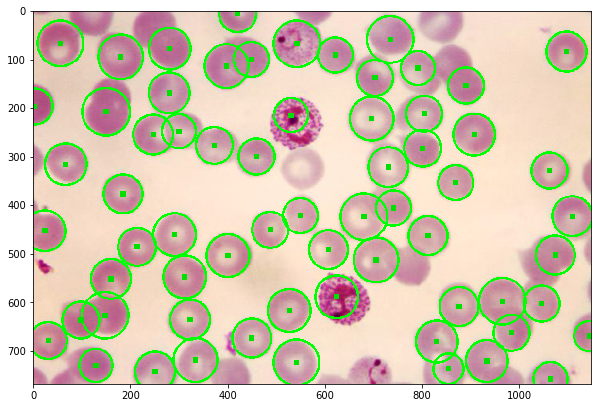

In [14]:
file_location = '//home//joe//Downloads//gimsea_stain3.jpg'
RBCs_count(file_location)